In [1]:
from keras.applications import VGG16
import os,sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras import optimizers
import time
import glob
import cv2

Using TensorFlow backend.
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflo

In [2]:
from keras import backend as K

if 'tensorflow' == K.backend():
    import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [3]:
model_file_name = 'model_SDNET2018_256.hdf5'
model = load_model('./model/' + model_file_name)

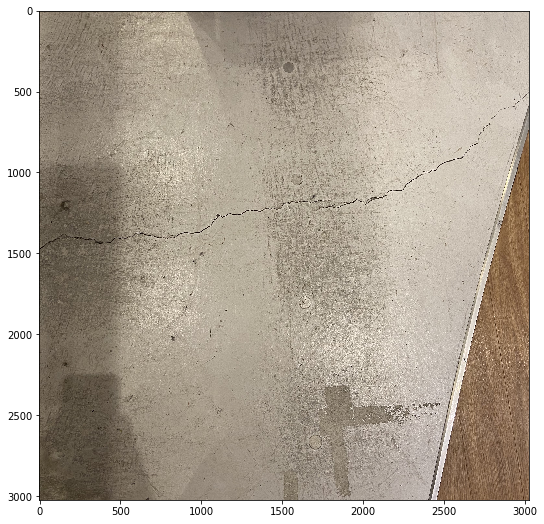

In [4]:
crack = []
files = glob.glob("./data/crack3/*.jpg")
for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        data = np.asarray(image)
        crack.append(data)
crack = np.array(crack)
crack = crack.astype('float32')
crack = crack / 255.0


fig = plt.figure(figsize=(16,9))
plt.imshow(crack[4])
plt.show()

In [5]:
"""
size = 256
dense_size = 2
img = crack[3]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

im_gray = 0.299 * im[:, :, 0] + 0.587 * im[:, :, 1] + 0.114 * im[:, :, 2]
pil_img_gray = Image.fromarray(np.uint8(im_gray*255))
cv2.imshow("image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
fig = plt.figure(figsize=(16,9))
plt.imshow(pil_img_gray, cmap="gray")
plt.show()
"""

'\nsize = 256\ndense_size = 2\nimg = crack[3]\ngray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\nim_gray = 0.299 * im[:, :, 0] + 0.587 * im[:, :, 1] + 0.114 * im[:, :, 2]\npil_img_gray = Image.fromarray(np.uint8(im_gray*255))\ncv2.imshow("image", gray)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\nfig = plt.figure(figsize=(16,9))\nplt.imshow(pil_img_gray, cmap="gray")\nplt.show()\n'

(2816, 2816)


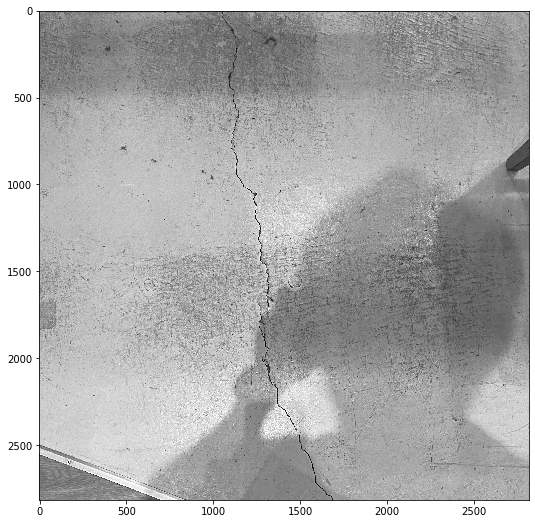

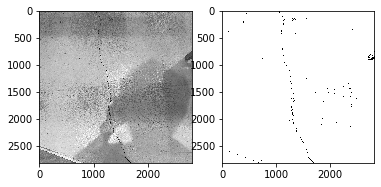

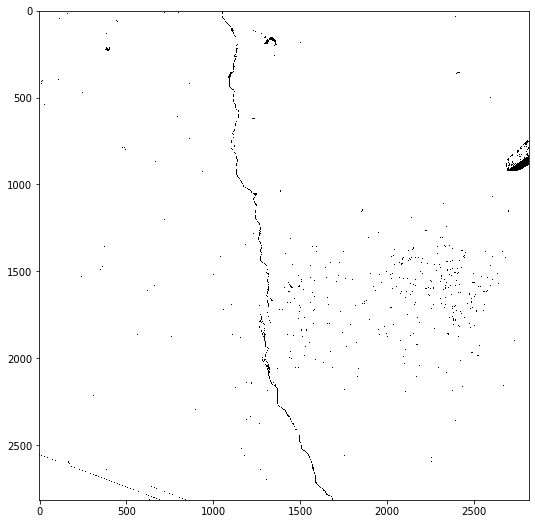

In [6]:
size = 256
dense_size = 2
img = crack[5]
v_size = img.shape[0] // size * size
h_size = img.shape[1] // size * size 
img = img[:v_size, :h_size]
v_split = img.shape[0] // size
h_split = img.shape[1] // size

"""
out_imgs = []
k = 0
for h_img in np.vsplit(img, v_split):
    for v_img in np.hsplit(h_img, h_split):
        out_imgs.append(v_img)
out_imgs = np.array(out_imgs)
#out_imgs[3] = Image.fromarray(np.uint8(out_imgs[3])*255)
#out_imgs[3] = out_imgs[3]*255

gray_img =  cv2.cvtColor(out_imgs[3], cv2.COLOR_BGR2GRAY)
gray_img = Image.fromarray(np.uint8(gray_img)*255)
thresh1 = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh1 = Image.fromarray(np.uint8(gray_img))
plt.subplot(121)
plt.imshow(gray_img, cmap="gray")
plt.subplot(122)
plt.imshow(thresh1, cmap="gray")
plt.show()
"""
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray_img.shape)
#gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
#print(gray_img.shape)
fig = plt.figure(figsize=(16,9))
plt.imshow(gray_img, cmap="gray")
plt.show()

#gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
#thresh1 = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

ret, thresh1 = cv2.threshold(gray_img, 0.3,1,cv2.THRESH_BINARY)
plt.subplot(121)
plt.imshow(gray_img, cmap="gray")
plt.subplot(122)
plt.imshow(thresh1, cmap="gray")
plt.show()
fig = plt.figure(figsize=(16,9))
plt.imshow(thresh1, cmap="gray")
plt.show()

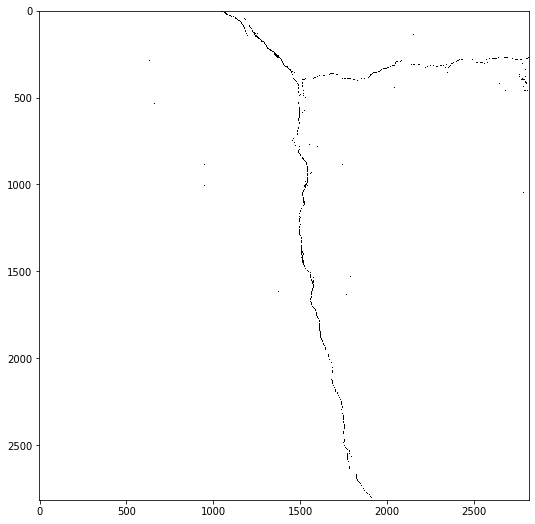

In [9]:
size = 256
dense_size = 2
img = crack[0]
v_size = img.shape[0] // size * size
h_size = img.shape[1] // size * size 
img = img[:v_size, :h_size]
v_split = img.shape[0] // size
h_split = img.shape[1] // size

out_imgs = []
k = 0
for h_img in np.vsplit(img, v_split):
    for v_img in np.hsplit(h_img, h_split):
        out_imgs.append(v_img)
out_imgs = np.array(out_imgs)

a = np_utils.to_categorical(0, dense_size)
predict = model.predict(out_imgs)
gray = []

for i in range(len(out_imgs)):
    gray_img = cv2.cvtColor(out_imgs[i], cv2.COLOR_BGR2GRAY)
    gray.append(gray_img)
        
for i in range(len(gray)):
    prei = predict[i:i+1]
    if prei.argmax() == 0:
        img = gray[i]
        ret,thresh1 = cv2.threshold(img,0.3,1,cv2.THRESH_BINARY)
        gray[i] = thresh1
    else:
        gray[i] = np.ones((size,size))

gray = np.array(gray)
out_imgs = gray

for i in range(v_split):
        for j in range(h_split):
            if k >= len(out_imgs):break
            im = out_imgs[k]
            if j == 0:im1 = im
            else:im1 = np.hstack((im1,im))
            k += 1
        if i == 0:im2 = im1
        else:im2 = np.vstack((im2,im1))
        if k>= len(out_imgs):break

fig = plt.figure(figsize=(16,9))
plt.imshow(im2, cmap="gray")
plt.show()